## 데이콘 비트코인 가격 예측 - ARIMA pilot

### google drive mount

In [ ]:
# colab drive mount 
import os
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# 폴더 path 설정 및 working directory 변경
folder_path = './drive/MyDrive'
os.chdir(folder_path)


# current working directory 확인
print(os.getcwd())
''' 정상 경로 : /content/drive/My Drive '''


# data uploading folder create
dir_name = 'bitcoin_dataset'

def make_dir(dir_name):
    try:
        # Create target Directory
        os.mkdir(dir_name)
        print("Directory " , dir_name ,  " Created ") 
    except FileExistsError:
        print("Directory " , dir_name ,  " already exists")

# 폴더 생성
make_dir(dir_name)

# 폴더 생성됬는 지 확인 
print(os.listdir())

# 업로드할 디렉토리 변경
os.chdir('./bitcoin_dataset/')

# current working directroy confirm
print(os.getcwd())

/content/drive/MyDrive
Directory  bitcoin_dataset  already exists
['Colab Notebooks', '산갱', 'somethings', '.ipynb_checkpoints', '블로그 방문관련 이슈 조사.gform', '제목 없는 설문지.gform', 'bitcoin_dataset', '인증.png']
/content/drive/MyDrive/bitcoin_dataset


### library import and data upload

In [ ]:
# !pip install statsmodels==0.11.1

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.arima.model import ARIMA
import datetime



# 데이터 확인
print(os.listdir())

# read file
train_x_df = pd.read_csv("./train_x_df.csv")
train_y_df = pd.read_csv("./train_y_df.csv")
print("Reading Complete!")

['train_x_df.csv', 'train_y_df.csv', 'merged_data.h5', 'vanilla_GRU_model.h5', 'Bidirectional_GRU_model.h5']
Reading Complete!


### 함수 정의

In [ ]:
# numpy arrary conversion

def df2d_to_array3d(df_2d):
    # 입력 받은 2차원 데이터 프레임을 3차원 numpy array로 변경하는 함수
    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    sample_index = df_2d.sample_id.value_counts().index
    array_3d = df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size])
    return array_3d

    # 샘플 확인

def plot_series(x_series, y_series):
    #입력 series와 출력 series를 연속적으로 연결하여 시각적으로 보여주는 코드 입니다.
    plt.plot(x_series, label = 'input_series')
    plt.plot(np.arange(len(x_series), len(x_series)+len(y_series)),
             y_series, label = 'output_series')
    plt.axhline(1, c = 'red')
    plt.legend()

### data reshaping

In [ ]:
train_x_array = df2d_to_array3d(train_x_df)
train_y_array = df2d_to_array3d(train_y_df)

idx = 7657 #coin num = 9, sammple id = 7657 
data_col_idx = 1 # 1 open, 2 high

# open 가격만 가지고 arima 시행
x_series = train_x_array[idx,:,data_col_idx] 
y_series = train_y_array[idx,:,data_col_idx]

print(f'''

train_x_array {x_series.shape}
train_y_array {y_series.shape}

''')



train_x_array (1380,)
train_y_array (120,)




### modeling & prediciton
arima 에서는 따로 전처리 필요 없음

In [ ]:
# ARIMA model fitting : model arguments 는 임의인 듯.?

print("ARIMA 계수의미 : {}".format("https://otexts.com/fppkr/arima-forecasting.html"), end='\n')

model = ARIMA(x_series, order=(2,0,2))
fit  = model.fit()
pred_by_arima = fit.predict(1381,1380+120, typ='levels')

ARIMA 계수의미 : https://otexts.com/fppkr/arima-forecasting.html


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


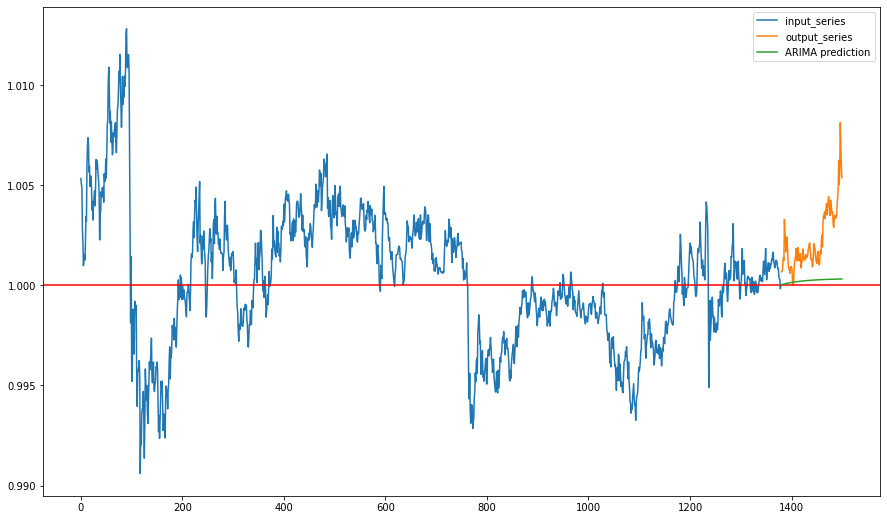

In [ ]:
# ARIMA 모델 결과
plot_series(x_series, y_series)
plt.plot(np.arange(1380, 1380+120), pred_by_arima, label = 'ARIMA prediction')
plt.legend()
plt.show()

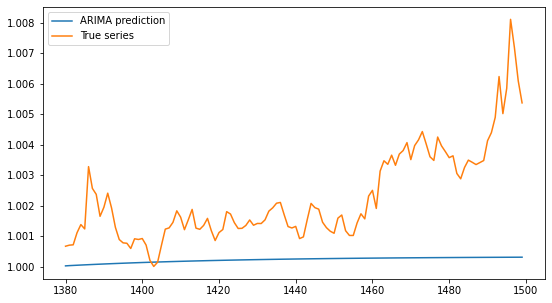

In [ ]:
pylab.rcParams['figure.figsize'] = (9, 5)

plt.plot(np.arange(1380, 1380+120), pred_by_arima, label = 'ARIMA prediction')
plt.plot(np.arange(1380, 1380+120), y_series, label ='True series')
plt.legend()
plt.show()